In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [54]:
mvt = pd.read_csv('./data/mvtWeek1.csv', parse_dates=[1], low_memory=False); mvt.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,41.756284,-87.621645
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,41.837568,-87.621761


In [55]:
mvt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191641 entries, 0 to 191640
Data columns (total 11 columns):
ID                     191641 non-null int64
Date                   191641 non-null datetime64[ns]
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
Latitude               189365 non-null float64
Longitude              189365 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 12.8+ MB


In [56]:
# Question 1. How many rows of data (observations) in the dataset?
print mvt.shape[0]

191641


In [57]:
# Question 2. How many variables are in this dataset?
print mvt.shape[1]

11


In [58]:
# Question 3. What is the max value of the variable ID?
print mvt.ID.max()

9181151


In [59]:
# Question 4. What is the minimum value of the variable 'Beat' ?
print mvt.Beat.min()

111


In [60]:
# Question 5. How many observations have value TRUE in the Arrest variable (this is the number of crimes for which an arrest was made)?
print len(mvt[mvt.Arrest == True])

15536


In [61]:
# Question 6. How many observations have a LocationDescription value of ALLEY?
print len(mvt[mvt.LocationDescription == 'ALLEY'])

2308


In [62]:
# Question: What is the month and year of the median date in our dataset? Enter your answer as "Month Year"
mvt.Date.order().ix[mvt.shape[0]/2] # May 2006

Timestamp('2006-05-21 12:30:00')

In [63]:
mvt['Month'] = mvt.Date.dt.month
mvt['WeekDay'] = mvt.Date.dt.dayofweek
mvt['Year'] = mvt.Date.dt.year

In [64]:
# Question: In which month did the fewest motor vehicle thefts occur ?
mvt.Month.value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
dtype: int64

In [65]:
mvt.WeekDay.value_counts() # index starts Monday -> 0, Tuesday -> 1 ...

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
dtype: int64

In [66]:
# Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. 
# Which month has the largest number of motor vehicle thefts for which an arrest was made?

mvt[mvt.Arrest == True].Month.value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
dtype: int64

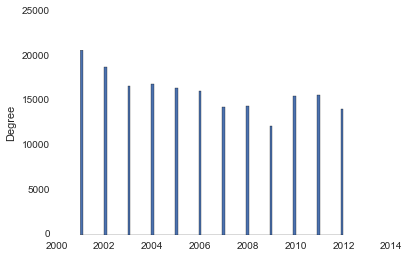

In [68]:
# Visualization
mvt.Year.plot(kind='hist', bins=100);

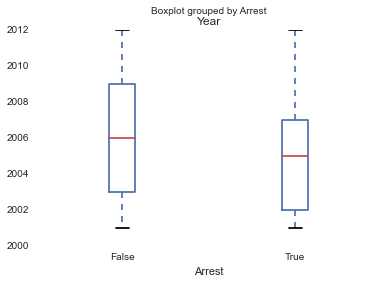

In [73]:
mvt.boxplot(column='Year', by='Arrest');

In [82]:
size = mvt.groupby(['Year', 'Arrest']).size()

In [84]:
# For what proportion of motor vehicles thefts in 2001 was an arrest made ?
arrest_by_years = size.unstack()

In [93]:
arrest_by_years['prop'] = arrest_by_years[arrest_by_years.columns[1]] / (arrest_by_years[arrest_by_years.columns[0]] + arrest_by_years[arrest_by_years.columns[1]])

In [94]:
arrest_by_years

Arrest,False,True,prop
Year,,,
2001,18517,2152,0.104117
2002,16638,2115,0.112782
2003,14859,1798,0.107943
2004,15169,1693,0.100403
2005,14956,1528,0.092696
2006,14796,1302,0.080880
2007,13068,1212,0.084874
2008,13425,1020,0.070613
2009,11327,840,0.069039


In [96]:
mvt.LocationDescription.value_counts().order(ascending=False)

STREET                             156564
PARKING LOT/GARAGE(NON.RESID.)      14852
OTHER                                4573
ALLEY                                2308
GAS STATION                          2111
DRIVEWAY - RESIDENTIAL               1675
RESIDENTIAL YARD (FRONT/BACK)        1536
RESIDENCE                            1302
RESIDENCE-GARAGE                     1176
VACANT LOT/LAND                       985
VEHICLE NON-COMMERCIAL                817
SIDEWALK                              462
CHA PARKING LOT/GROUNDS               405
AIRPORT/AIRCRAFT                      363
POLICE FACILITY/VEH PARKING LOT       266
...
SAVINGS AND LOAN                               4
BARBERSHOP                                     4
CLEANING STORE                                 3
MEDICAL/DENTAL OFFICE                          3
BOWLING ALLEY                                  3
COLLEGE/UNIVERSITY RESIDENCE HALL              2
BRIDGE                                         2
CURRENCY EXCHANGE      

In [97]:
mvt_top_5_locations = mvt[(mvt.LocationDescription == 'STREET')|
                         (mvt.LocationDescription == 'PARKING LOT/GARAGE(NON.RESID.)')|
                         (mvt.LocationDescription == 'ALLEY')|
                         (mvt.LocationDescription == 'GAS STATION')|
                         (mvt.LocationDescription == 'DRIVEWAY - RESIDENTIAL')]

print len(mvt_top_5_locations)

177510


In [119]:
h = mvt_top_5_locations.groupby(['LocationDescription', 'Arrest']).size()

In [120]:
c = h.unstack()

In [121]:
c.head()

Arrest,False,True
LocationDescription,,
ALLEY,2059,249
DRIVEWAY - RESIDENTIAL,1543,132
GAS STATION,1672,439
PARKING LOT/GARAGE(NON.RESID.),13249,1603
STREET,144969,11595


In [122]:
c['prop'] = c[c.columns[1]] / (c[c.columns[0]] + c[c.columns[1]])

In [123]:
c.prop.order(ascending=False)

LocationDescription
GAS STATION                       0.207958
PARKING LOT/GARAGE(NON.RESID.)    0.107932
ALLEY                             0.107886
DRIVEWAY - RESIDENTIAL            0.078806
STREET                            0.074059
Name: prop, dtype: float64

In [129]:
df = mvt_top_5_locations.groupby(['LocationDescription', 'WeekDay']).size()

In [131]:
df = df.unstack()

In [134]:
df

WeekDay,0,1,2,3,4,5,6
LocationDescription,,,,,,,
ALLEY,320,323,317,315,385,341,307
DRIVEWAY - RESIDENTIAL,255,243,234,263,257,202,221
GAS STATION,280,270,273,282,332,338,336
PARKING LOT/GARAGE(NON.RESID.),2128,2073,2103,2082,2331,2199,1936
STREET,22305,21888,22371,22296,23773,22175,21756


In [136]:
df[df.index == 'GAS STATION'].max(axis=1)

LocationDescription
GAS STATION            338
dtype: int64

In [137]:
df[df.index == 'DRIVEWAY - RESIDENTIAL'].min(axis=1)

LocationDescription
DRIVEWAY - RESIDENTIAL    202
dtype: int64